In [535]:
import pandas as pd
import numpy as np
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [536]:
df=pd.read_csv("train_agri.csv")

In [537]:
df.head()

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
0,F00000001,188,1,0,1,0,0.0,0,1,0
1,F00000003,209,1,0,1,0,0.0,0,2,1
2,F00000004,257,1,0,1,0,0.0,0,2,1
3,F00000005,257,1,1,1,0,0.0,0,2,1
4,F00000006,342,1,0,1,0,0.0,0,2,1


In [538]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4599 entries, 0 to 4598
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       4599 non-null   object 
 1   Estimated_Insects_Count  4599 non-null   int64  
 2   Crop_Type                4599 non-null   int64  
 3   Soil_Type                4599 non-null   int64  
 4   Pesticide_Use_Category   4599 non-null   int64  
 5   Number_Doses_Week        4599 non-null   int64  
 6   Number_Weeks_Used        4157 non-null   float64
 7   Number_Weeks_Quit        4599 non-null   int64  
 8   Season                   4599 non-null   int64  
 9   Crop_Damage              4599 non-null   int64  
dtypes: float64(1), int64(8), object(1)
memory usage: 359.4+ KB


In [539]:
#filling missing values
df["Number_Weeks_Used"]=df["Number_Weeks_Used"].fillna(df["Number_Weeks_Used"].median())

In [540]:
df["Crop_Damage"].value_counts()


0    3820
1     664
2     115
Name: Crop_Damage, dtype: int64

In [541]:
df["Crop_Type"].value_counts()

0    3565
1    1034
Name: Crop_Type, dtype: int64

In [542]:
df["Season"].value_counts()
#here we are talking about 3 seasons in a year we can say summer raining ND winter.

2    2327
1    1379
3     893
Name: Season, dtype: int64

In [543]:
df["Pesticide_Use_Category"].value_counts()

2    3205
3    1349
1      45
Name: Pesticide_Use_Category, dtype: int64

In [544]:
df["Soil_Type"].value_counts()

0    2407
1    2192
Name: Soil_Type, dtype: int64

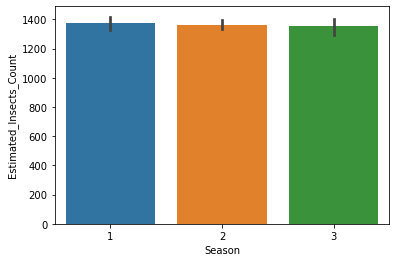

In [545]:
sns.barplot(x=df["Season"],y=df["Estimated_Insects_Count"],data=df)

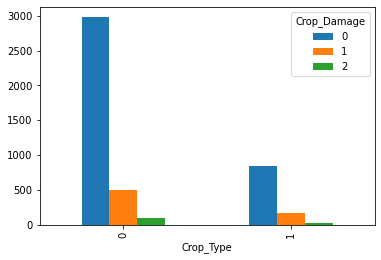

In [546]:
pd.crosstab(df["Crop_Type"],df["Crop_Damage"]).plot(kind='bar')

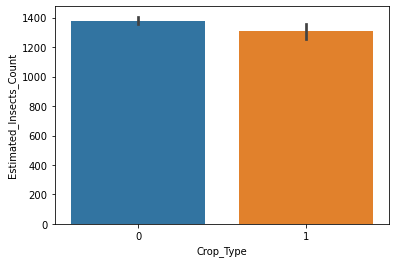

In [547]:
sns.barplot(x=df["Crop_Type"],y=df["Estimated_Insects_Count"],data=df)

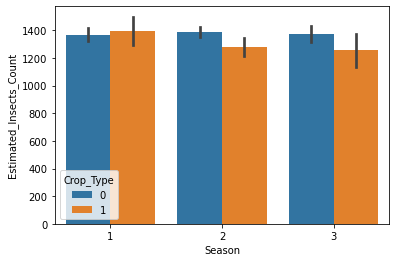

In [548]:
sns.barplot(x="Season",y="Estimated_Insects_Count",hue="Crop_Type",data=df)
#as per this graph we can see that the crop number 1 is haveing more Estimated_Insects_Count,in season 1 as compare to others.

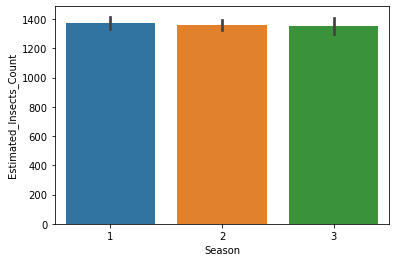

In [549]:
sns.barplot(x=df["Season"],y=df["Estimated_Insects_Count"],data=df)
#this graph represents the heighest insects count in available season .

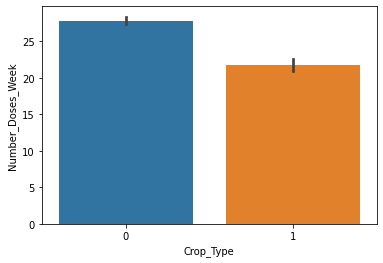

In [550]:
sns.barplot(x=df["Crop_Type"],y=df["Number_Doses_Week"],data=df)

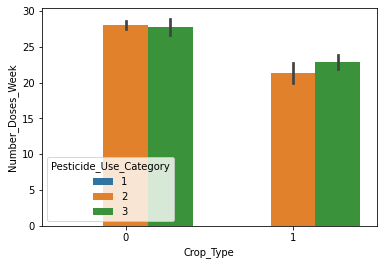

In [551]:
sns.barplot(x="Crop_Type",y="Number_Doses_Week",hue="Pesticide_Use_Category",data=df)
#

In [552]:
corr_matrix=df.corr()
corr_matrix["Crop_Damage"].sort_values(ascending=False)

Crop_Damage                1.000000
Number_Weeks_Used          0.231439
Estimated_Insects_Count    0.202312
Pesticide_Use_Category     0.199195
Crop_Type                  0.021772
Season                    -0.016196
Number_Doses_Week         -0.018363
Soil_Type                 -0.059481
Number_Weeks_Quit         -0.152918
Name: Crop_Damage, dtype: float64

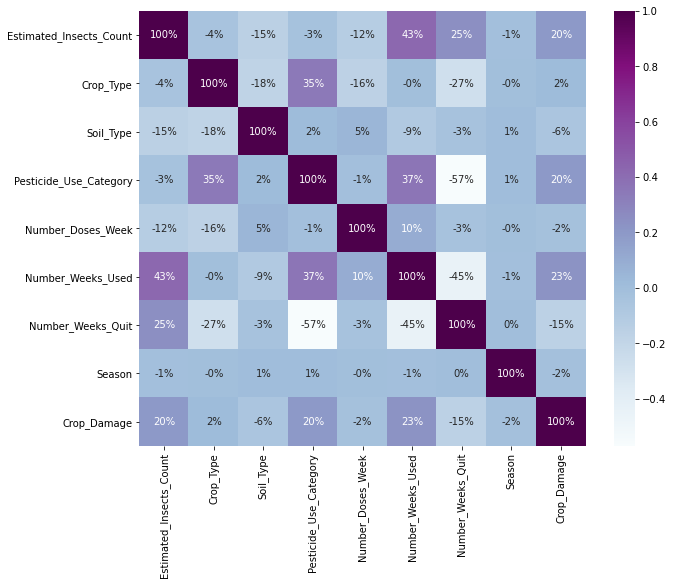

In [553]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True,fmt=".0%",cmap='BuPu')
plt.show()

we can see that attributes like (Number_Weeks_Used,Number_Weeks_Quit,Pesticide_Use_Category,Estimated_Insects_Count)has a high correlation with target variable "Crop_Damage"
and And the season crop_type, number_doses_week ,soil_type,Number_Weeks_Quit, are in neagtive correaltion.

In [554]:
df.drop(columns=["ID","Season","Number_Doses_Week","Crop_Type"],axis=1,inplace=True)

In [555]:
df["Crop_Damage"].value_counts()

0    3820
1     664
2     115
Name: Crop_Damage, dtype: int64

In [556]:
df.skew()

Estimated_Insects_Count    0.911469
Soil_Type                  0.093631
Pesticide_Use_Category     0.678586
Number_Weeks_Used          0.299898
Number_Weeks_Quit          0.919771
Crop_Damage                2.306933
dtype: float64

In [557]:
# df['Crop_Damage'] = df['Crop_Damage'].apply(np.int64)


In [558]:
x_d=df.drop("Crop_Damage",axis=1)
y=df["Crop_Damage"]

In [559]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc.fit(x_d)
x=sc.transform(x_d)
x=pd.DataFrame(x,columns=x_d.columns)

In [560]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.metrics import f1_score
from sklearn import svm  
from sklearn.metrics import precision_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import recall_score
from sklearn.model_selection import train_test_split

In [561]:
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test=train_test_split(x,y,random_state = 47,test_size=0.20)


In [562]:
from sklearn.ensemble import RandomForestClassifier

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.metrics import f1_score
from sklearn import svm  
from sklearn.metrics import precision_score
from sklearn.model_selection import cross_val_score

from sklearn.metrics import recall_score

In [563]:
model=[DecisionTreeClassifier(),svm.SVC(),KNeighborsClassifier(),GradientBoostingClassifier()]
for m in model:
    m.fit(X_train,Y_train)
    predm=m.predict(X_test)
    print("Score of",m,"is",accuracy_score(Y_test,predm))
    print("Cross val score:",cross_val_score(m,x,y,cv=5,scoring="accuracy").mean())
    print("\n")


Score of DecisionTreeClassifier() is 0.7576086956521739
Cross val score: 0.736252779486209


Score of SVC() is 0.8358695652173913
Cross val score: 0.8330068126981123


Score of KNeighborsClassifier() is 0.8304347826086956
Cross val score: 0.8062646070870985


Score of GradientBoostingClassifier() is 0.8282608695652174
Cross val score: 0.8230053933860055




In [564]:
model=svm.SVC(C= 9, kernel= 'rbf')
model.fit(X_train,Y_train)
ypred=model.predict(X_test)
print("Accuracy score is:",accuracy_score(Y_test,ypred))
print("F1 score is:",f1_score(Y_test,ypred,average='macro'))
print('Precision score is:',precision_score(Y_test, ypred, average='macro'))
print("Recall score is:",recall_score(Y_test,ypred,average="macro"))

Accuracy score is: 0.8358695652173913
F1 score is: 0.3398917915460619
Precision score is: 0.5214854818815214
Recall score is: 0.3525037311512531


C:\Users\Preeti kumari\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [565]:
df_o=pd.DataFrame(ypred)
df_o.to_csv("agri_ankit.csv")

In [566]:
import joblib
joblib.dump(model,"agri_ankit.pkl")

['agri_ankit.pkl']

In [567]:
agri_test=pd.read_csv("test_agri.csv")

In [568]:
agri_test.head()

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season
0,F00000002,188,1,1,1,0,NaN,0,2
1,F00000007,410,1,1,1,0,0.0,0,2
2,F00000011,626,1,0,1,0,0.0,0,2
3,F00000013,731,1,0,1,0,0.0,0,2
4,F00000014,789,0,0,1,0,0.0,0,1


In [569]:
agri_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1199 entries, 0 to 1198
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       1199 non-null   object 
 1   Estimated_Insects_Count  1199 non-null   int64  
 2   Crop_Type                1199 non-null   int64  
 3   Soil_Type                1199 non-null   int64  
 4   Pesticide_Use_Category   1199 non-null   int64  
 5   Number_Doses_Week        1199 non-null   int64  
 6   Number_Weeks_Used        1080 non-null   float64
 7   Number_Weeks_Quit        1199 non-null   int64  
 8   Season                   1199 non-null   int64  
dtypes: float64(1), int64(7), object(1)
memory usage: 84.4+ KB


In [570]:
agri_test["Number_Weeks_Used"]=agri_test["Number_Weeks_Used"].fillna(agri_test["Number_Weeks_Used"].median())
#imputing median in the null value

In [571]:
agri_test.isnull().sum()
#no null values

ID                         0
Estimated_Insects_Count    0
Crop_Type                  0
Soil_Type                  0
Pesticide_Use_Category     0
Number_Doses_Week          0
Number_Weeks_Used          0
Number_Weeks_Quit          0
Season                     0
dtype: int64

In [572]:
agri_test.drop(columns=["ID","Season","Number_Doses_Week","Crop_Type"],axis=1,inplace=True)
#dropping column as per finding relation between the

In [573]:
agri_test.skew()

Estimated_Insects_Count    1.098665
Soil_Type                  0.179422
Pesticide_Use_Category     0.089675
Number_Weeks_Used          0.245465
Number_Weeks_Quit          1.191013
dtype: float64

In [574]:
from sklearn.preprocessing import power_transform
agri_test_sk=power_transform(agri_test,method="yeo-johnson")
agri_test_sk=pd.DataFrame(agri_test_sk,columns=agri_test.columns)

In [575]:
agri_test_sk.skew()

Estimated_Insects_Count   -0.016231
Soil_Type                  0.179422
Pesticide_Use_Category    -0.020323
Number_Weeks_Used         -0.010228
Number_Weeks_Quit          0.115384
dtype: float64

In [576]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc.fit(agri_test_sk)
x_agri=sc.transform(agri_test_sk)
x_agri=pd.DataFrame(x_agri,columns=agri_test_sk.columns)

In [577]:
model=svm.SVC()
model.fit(X_train,Y_train)
y_pred=model.predict(x_agri)


In [578]:
df_pred=pd.DataFrame(y_pred)
df_pred.to_csv("agri_ankit.csv")

In [579]:
df_pred[0].unique()

array([1, 0], dtype=int64)

In [580]:
df_pred[0].value_counts()

0    1177
1      22
Name: 0, dtype: int64

In [583]:
import joblib
joblib.dump(model,"agri_pose.pkl")

['agri_pose.pkl']